# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import seaborn as sns
from matplotlib.ticker import FuncFormatter


In [2]:
# Main data set for Expenses of sports for each  Universities
ExpDF=pd.read_csv('Expenses_All_Sports_and_Mens_Womens_and_Coed_Teams_2003_2015.csv')

In [3]:
#Finding total expenses
ExpTotal = ExpDF[['Survey Year','Institution Name','Grand Total Expenses']]

In [4]:
# Main data set for Revenues of sports for each Universities
RevDF = pd.read_csv('Revenues_All_Sports_and_Mens_Womens_and_Coed_Teams_2003_2015.csv')

In [5]:
#Finding total revenues
RevTotal = RevDF [['Survey Year','Institution Name','Grand Total Revenue']]

In [6]:
#Revenues from sports teams for each university
MsuRev = RevTotal[RevTotal['Institution Name']=='Michigan State University'][['Survey Year','Grand Total Revenue']]
UMannRev = RevTotal[RevTotal['Institution Name']=='University of Michigan-Ann Arbor'][['Survey Year','Grand Total Revenue']]
MtuRev = RevTotal[RevTotal['Institution Name']=='Michigan Technological University'][['Survey Year','Grand Total Revenue']] 
UMdearRev = RevTotal[RevTotal['Institution Name']=='University of Michigan-Dearborn'][['Survey Year','Grand Total Revenue']] 

In [7]:
#Expenses for sports teams for each university
MSuExp = ExpTotal[ExpTotal['Institution Name']=='Michigan State University'][['Survey Year','Grand Total Expenses']]
UMannExp = ExpTotal[ExpTotal['Institution Name']=='University of Michigan-Ann Arbor'][['Survey Year','Grand Total Expenses']]
MtuExp = ExpTotal[ExpTotal['Institution Name']=='Michigan Technological University'][['Survey Year','Grand Total Expenses']] 
UMdearExp = ExpTotal[ExpTotal['Institution Name']=='University of Michigan-Dearborn'][['Survey Year','Grand Total Expenses']] 

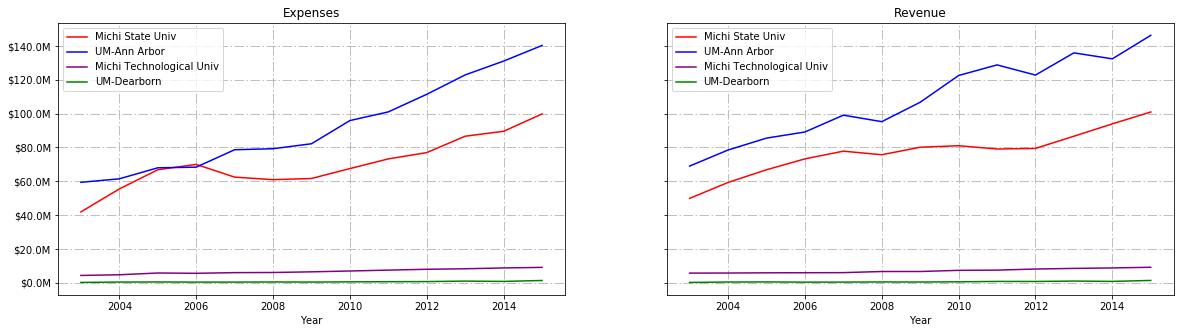

In [144]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)
    

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5),sharey=True)
ax1.plot(MSuExp['Survey Year'],MSuExp['Grand Total Expenses'],label='Michi State Univ',c='red')
ax1.plot(UMannExp['Survey Year'],UMannExp['Grand Total Expenses'],label='UM-Ann Arbor',c='blue')
ax1.plot(MtuExp['Survey Year'],MtuExp['Grand Total Expenses'],label='Michi Technological Univ',c='purple')
ax1.plot(UMdearExp['Survey Year'],UMdearExp['Grand Total Expenses'],label='UM-Dearborn',c='green')
ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True)
gridlines = ax1.get_ygridlines() + ax1.get_xgridlines()
for line in gridlines:
    line.set_linestyle('-.')
ax1.set_xlabel('Year')
ax1.set_title('Expenses')
ax1.legend()

ax2.plot(MsuRev['Survey Year'],MsuRev['Grand Total Revenue'],label='Michi State Univ',c='red')
ax2.plot(UMannRev['Survey Year'],UMannRev['Grand Total Revenue'],label='UM-Ann Arbor',c='blue')
ax2.plot(MtuRev['Survey Year'],MtuRev['Grand Total Revenue'],label='Michi Technological Univ',c='purple')
ax2.plot(UMdearRev['Survey Year'],UMdearRev['Grand Total Revenue'],label='UM-Dearborn',c='green')
ax2.yaxis.set_major_formatter(formatter)
ax2.grid(True)
gridlines = ax2.get_ygridlines() + ax2.get_xgridlines()
for line in gridlines:
    line.set_linestyle('-.')
ax2.set_xlabel('Year')
ax2.set_title('Revenue')
ax2.legend()

fig.savefig('Top5.jpg')

plt.show()

In [9]:
import re

In [10]:
SportsExp = ExpDF.groupby('Institution Name').sum() [:].filter(regex=(".*Total.*"))
SportsExp.drop(SportsExp.columns[-4:],axis = 1, inplace = True)

In [72]:
# Finding the top 5 expensive sports  for each university 
MsuExpTop5 = SportsExp.loc['Michigan State University'].sort_values(ascending=False).head()
MsuExpX = MsuRevTop5.index
MsuExpY = MsuRevTop5.values

UMannExpTop5 = SportsExp.loc['University of Michigan-Ann Arbor'].sort_values(ascending=False).head()
UMannExpX = UMannExpTop5.index
UMannExpY = UMannExpTop5.values

MtuExpTop5 = SportsExp.loc['Michigan Technological University'].sort_values(ascending=False).head()
MtuExpX = MtuExpTop5.index
MtuExpY = MtuExpTop5.values

UMdearExpTop5 = SportsExp.loc['University of Michigan-Dearborn'].sort_values(ascending=False).head()
UMdearExpX = UMdearExpTop5.index
UMdearExpY = UMdearExpTop5.values

In [73]:
SportsRev = RevDF.groupby('Institution Name').sum() [:].filter(regex=(".*Total.*"))
SportsRev.drop(SportsRev.columns[-4:],axis = 1, inplace = True)

In [74]:
# Finding the top 5 sports for each university which generated the highest revenues.
MsuRevTop5 = SportsRev.loc['Michigan State University'].sort_values(ascending=False).head()
MsuRevX = MsuRevTop5.index
MsuRevY = MsuRevTop5.values

UMannRevTop5 = SportsRev.loc['University of Michigan-Ann Arbor'].sort_values(ascending=False).head()
UMannRevX = UMannRevTop5.index
UMannRevY = UMannRevTop5.values

MtuRevTop5 = SportsRev.loc['Michigan Technological University'].sort_values(ascending=False).head()
MtuRevX = MtuRevTop5.index
MtuRevY = MtuRevTop5.values

UMdearRevTop5 = SportsRev.loc['University of Michigan-Dearborn'].sort_values(ascending=False).head()
UMdearRevX = UMdearRevTop5.index
UMdearRevY = UMdearRevTop5.values


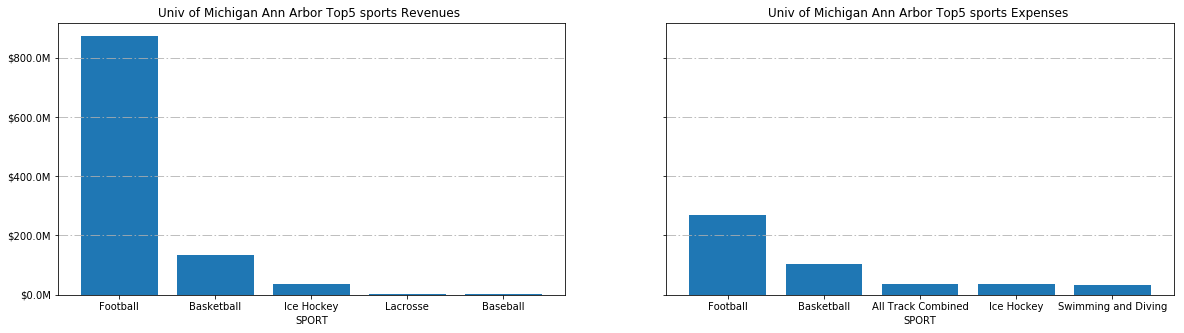

In [141]:
x = np.arange(1,6)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5),sharey=True)
ax1.bar(x,UMannRevY)
ax1.set_xticks(x)
ax1.set_xticklabels([i.split(' Total')[0] for i in UMannRevX])
ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True,axis='y')
gridlines = ax1.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')
ax1.set_xlabel('SPORT')
ax1.set_title('Univ of Michigan Ann Arbor Top5 sports Revenues ')


ax2.bar(x,UMannExpY)
ax2.set_xticks(x)
ax2.set_xticklabels([i.split(' Total')[0] for i in UMannExpX])
ax2.yaxis.set_major_formatter(formatter)
ax2.grid(True,axis='y')
gridlines = ax2.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')
ax2.set_xlabel('SPORT')
ax2.set_title('Univ of Michigan Ann Arbor Top5 sports Expenses ')

fig.savefig('AnnArbor.jpg')


plt.show()

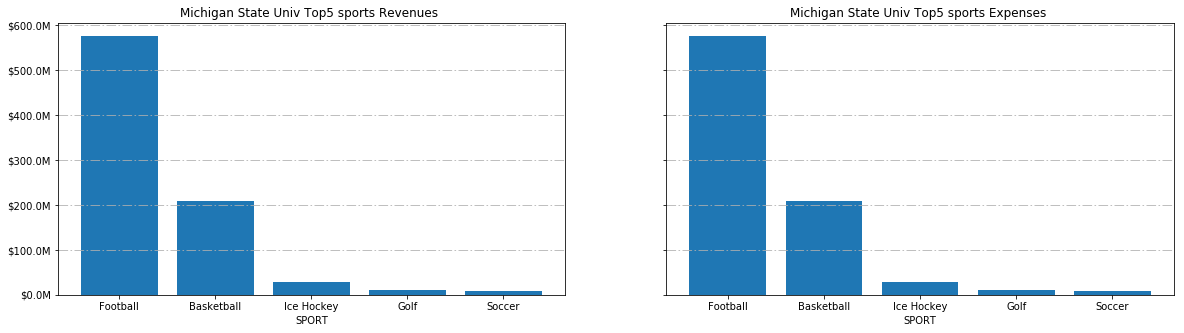

In [143]:
fig,(ax3,ax4)  = plt.subplots(1,2,figsize=(20,5),sharey=True)
ax3.bar(x,MsuRevY)
ax3.set_xticks(x)
ax3.set_xticklabels([i.split(' Total')[0] for i in MsuRevX])
ax3.yaxis.set_major_formatter(formatter)
ax3.grid(True,axis='y')
gridlines = ax3.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')
ax3.set_xlabel('SPORT')
ax3.set_title('Michigan State Univ Top5 sports Revenues ')

ax4.bar(x,MsuExpY)
ax4.set_xticks(x)
ax4.set_xticklabels([i.split(' Total')[0] for i in MsuExpX])
ax4.yaxis.set_major_formatter(formatter)
ax4.grid(True,axis='y')
gridlines = ax4.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')
ax4.set_xlabel('SPORT')
ax4.set_title('Michigan State Univ Top5 sports Expenses ')

fig.savefig('MSU.jpg')

plt.show()

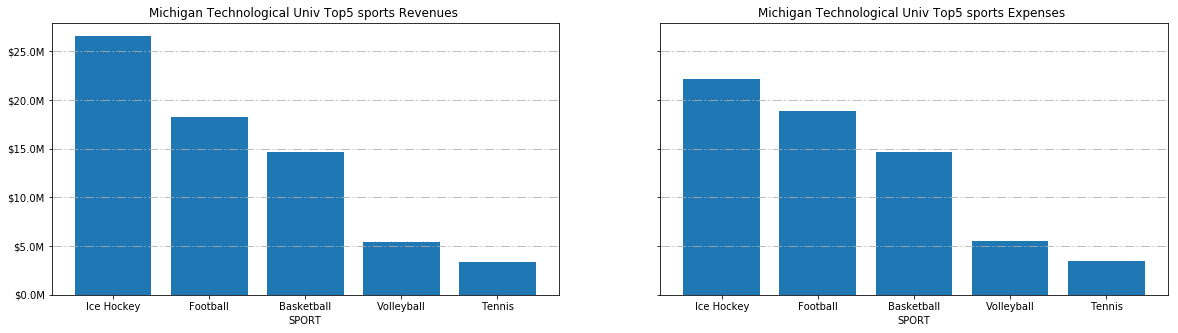

In [142]:
fig,(ax5,ax6) = plt.subplots(1,2,figsize=(20,5),sharey=True)

ax5.bar(x,MtuRevY)
ax5.set_xticks(x)
ax5.set_xticklabels([i.split(' Total')[0] for i in MtuRevX])
ax5.yaxis.set_major_formatter(formatter)
ax5.grid(True,axis='y')
gridlines = ax5.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')
ax5.set_xlabel('SPORT')
ax5.set_title('Michigan Technological Univ Top5 sports Revenues ')

ax6.bar(x,MtuExpY)
ax6.set_xticks(x)
ax6.set_xticklabels([i.split(' Total')[0] for i in MtuExpX])
ax6.yaxis.set_major_formatter(formatter)
ax6.grid(True,axis='y')
gridlines = ax6.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')
ax6.set_xlabel('SPORT')
ax6.set_title('Michigan Technological Univ Top5 sports Expenses ')

fig.savefig('MTU.jpg')

plt.show()

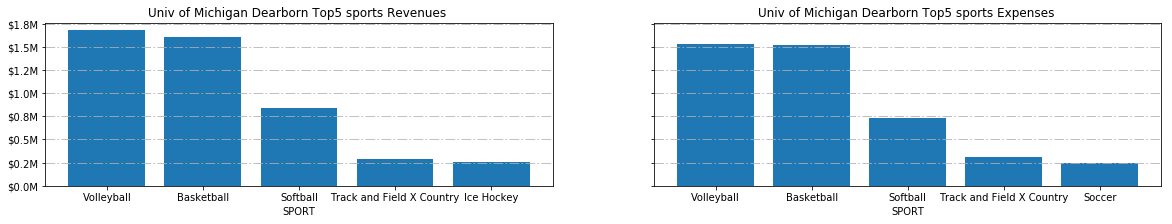

In [139]:
fig,(ax7,ax8) = plt.subplots(1,2,figsize=(20,5),sharey=True)

ax7.bar(x,UMdearRevY)
ax7.set_xticks(x)
ax7.set_xticklabels([i.split(' Total')[0] for i in UMdearRevX])
ax7.yaxis.set_major_formatter(formatter)
ax7.grid(True,axis='y')
gridlines = ax7.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')
ax7.set_xlabel('SPORT')
ax7.set_title('Univ of Michigan Dearborn Top5 sports Revenues ')

ax8.bar(x,UMdearExpY)
ax8.set_xticks(x)
ax8.set_xticklabels([i.split(' Total')[0] for i in UMdearExpX])
ax8.yaxis.set_major_formatter(formatter)
ax8.grid(True,axis='y')
gridlines = ax8.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')
ax8.set_xlabel('SPORT')
ax8.set_title('Univ of Michigan Dearborn Top5 sports Expenses ')

fig.savefig('UMich Dearborn.jpg')

plt.show()